# Three variable Monte-Carlo real mass function integral


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import pandas as pd
import scipy as sp
import scipy.integrate as integrate
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

/global/cfs/cdirs/des/zhou/spt_selection/heidicode/mass_function.py:21: RuntimeWarning: divide by zero encountered in log
  n = np.log(hist_data[0])  #numbers in each bin
/global/cfs/cdirs/des/zhou/spt_selection/heidicode/mass_function.py:30: RuntimeWarning: invalid value encountered in double_scalars
  slope = (n[i + 1] - n[i]) / (bins[i + 1] - bins[i])


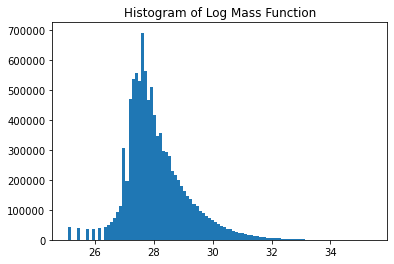

In [2]:
from mass_function import MassFunction

mf = MassFunction()


# Richness scaling relations


In [3]:
%run /global/project/projectdirs/des/zhou/spt_selection/header.py

In [4]:
import copy

lnM = np.log(mf.mass)
nh = len(lnM)

In [5]:
lnMwl_mean = copy.deepcopy(lnM)
lnlam_mean = alpha_lam * lnM + pi_lam
lnSZ_mean = alpha_SZ * lnM + pi_SZ


# MonteCarlo

First, Monte Carlo from the covariance matrix and the mean. How does this work?

Second, define a narrow richness bin to mimic the distribution of halo mass given richness. The expectation value given no correlation should be
$$\frac{\lambda-\pi_{\lambda}}{\alpha_{\lambda}}$$

But the downward correction is
$$-(\frac{\sigma_\lambda}{\alpha})^2 \beta$$

Third,


In [6]:
color_list = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:cyan', "gold"]


In [13]:
from monte_carlo_observable import MonteCarloObservables

mco = MonteCarloObservables(nh,
                            0.5,
                            np.log(mf.mass),
                            lnlam_mean=lnlam_mean,
                            lnSZ_mean=lnSZ_mean,
                            lnMwl_mean=lnMwl_mean,
                            scatter_lam=scatter_lam,
                            scatter_Mwl=scatter_Mwl,
                            scatter_SZ=scatter_SZ,
                            mf_slope_interp=mf.beta)
NBINS = 1

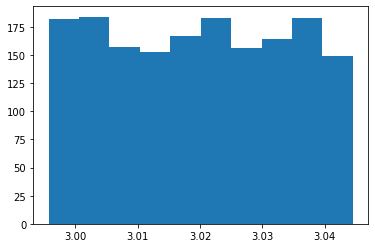

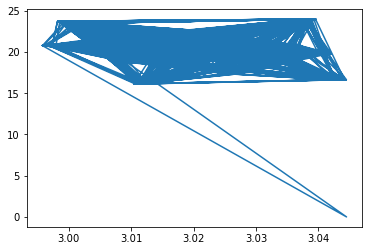

/global/homes/z/zchusre/.conda/envs/spt_selection/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:9289: RuntimeWarning: invalid value encountered in true_divide
  self._hpdf = self._hpdf / float(np.sum(self._hpdf * self._hbin_widths))


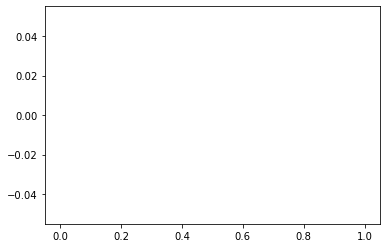

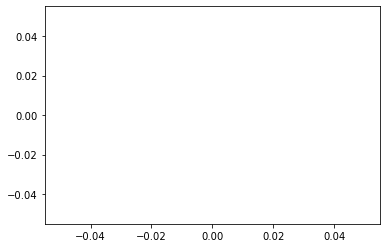

/global/homes/z/zchusre/.conda/envs/spt_selection/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/homes/z/zchusre/.conda/envs/spt_selection/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Lam bounds are 2.995732273553991 3.044522437723423
SZ bounds are -6.907755278982137 -6.214608098422191
The normalization factors are: 1 1


100%|██████████| 100/100 [00:00<00:00, 148.63it/s]

453.4099412776071
Theory:453.4099412776071 MC:nan
[[0.]]
[[nan]]


In [20]:
lam_array, SZ_array, diff_array, count_array = mco.mc_calculate_mean_mwl_given_lam_sz(lam1=10,lam2=12,sz1=0.001,sz2=0.1,
    nbins=NBINS + 1, correction=True)
# lam_array_nc, SZ_array_nc, diff_array_nc, count_array_nc = mco.MC_calculate_mean_Mwl_given_lam_SZ(nbins = NBINS+1,correction=False)

print(count_array)
print(np.exp(diff_array))

In [ ]:
mco.lnlam

array([2.13083161, 1.29491865, 1.57521803, ..., 0.35670986, 0.49800844,
       1.11649874])

In [ ]:
np.ma.masked_outside(mco.lnlam,np.log(20),np.log(30)).compressed().min()

2.995741300216306

In [ ]:
data_cropped = np.ma.masked_outside(mco.lnlam,np.log(20),np.log(30)).compressed()

In [ ]:
testkde = sp.stats.gaussian_kde(data_cropped)

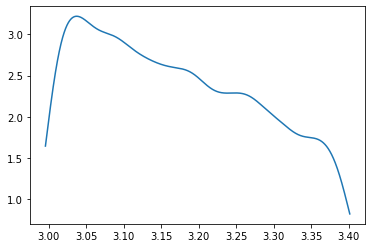

In [ ]:
plt.plot(np.linspace(np.log(20), np.log(30), 10000),
         testkde.evaluate(np.linspace(np.log(20), np.log(30), 10000)))


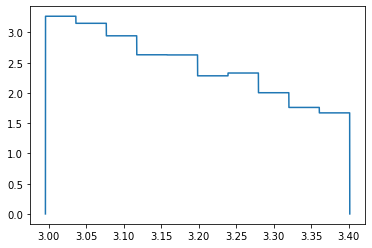

In [ ]:
test_rv = sp.stats.rv_histogram(np.histogram(data_cropped,bins=10))
plt.plot(np.linspace(np.log(20), np.log(30), 10000),
         test_rv.pdf(np.linspace(np.log(20), np.log(30), 10000)))


(array([668., 676., 697., 599., 634., 577., 564., 518., 532., 549., 487.,
        452., 466., 492., 416., 408., 361., 363., 362., 325.]),
 array([2.9957413 , 3.01600712, 3.03627294, 3.05653875, 3.07680457,
        3.09707039, 3.1173362 , 3.13760202, 3.15786784, 3.17813366,
        3.19839947, 3.21866529, 3.23893111, 3.25919693, 3.27946274,
        3.29972856, 3.31999438, 3.3402602 , 3.36052601, 3.38079183,
        3.40105765]),
 <BarContainer object of 20 artists>)

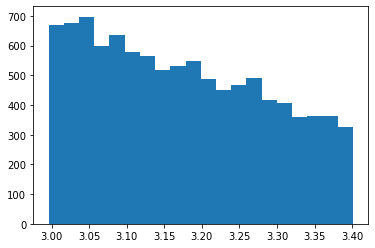

In [ ]:
plt.hist(np.ma.masked_outside(mco.lnlam,np.log(20),np.log(30)).compressed(),bins=20)

In [ ]:
data = data_cropped[:, np.newaxis]
X_plot = np.linspace(np.min(data),np.max(data))[:, np.newaxis]

In [ ]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel="gaussian", bandwidth=0.001).fit(data)
log_den = kde.score_samples(X_plot)

In [ ]:
kde.score_samples(np.linspace(np.log(20),np.log(30),10000)[:,np.newaxis])

array([ 0.4698341 ,  0.50341424,  0.53606364, ..., -0.38834804,
       -0.42639059, -0.46551287])

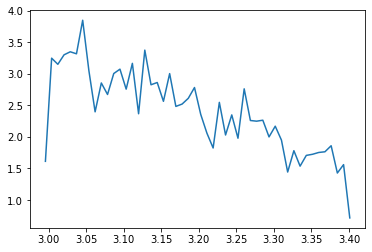

In [ ]:
plt.plot(X_plot,np.exp(log_den))

In [ ]:
points,step = np.linspace(data.min(),data.max(),1000,retstep=True)
sum_w_steps = 0
sum_wo_steps = 0
for point in tqdm(points):
    pdf = np.exp(kde.score_samples(np.array([[point]])))
    sum_wo_steps += pdf
    sum_w_steps += pdf*step
print(sum_w_steps)
print(sum_wo_steps)

100%|██████████| 1000/1000 [00:00<00:00, 1053.77it/s]

[0.9986291]
[2461.3625167]


In [ ]:
print(sum_w_steps)
print(sum_wo_steps)

[0.99884559]
[142.29334257]


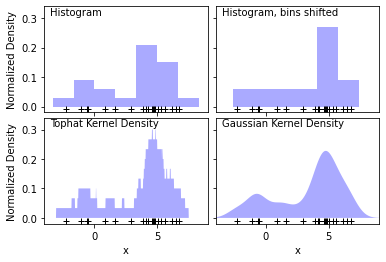

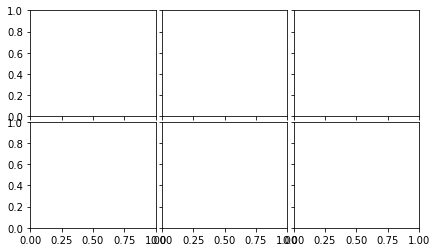

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc="#AAAAFF", density=True)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc="#AAAAFF", density=True)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel="tophat", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), "+k")
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel("Normalized Density")

for axi in ax[1, :]:
    axi.set_xlabel("x")

# ----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return "0"
    elif x == 1:
        return "h"
    elif x == -1:
        return "-h"
    else:
        return "%ih" % x

In [ ]:
X
print(X_plot)

[[-6.        ]
 [-5.98798799]
 [-5.97597598]
 [-5.96396396]
 [-5.95195195]
 [-5.93993994]
 [-5.92792793]
 [-5.91591592]
 [-5.9039039 ]
 [-5.89189189]
 [-5.87987988]
 [-5.86786787]
 [-5.85585586]
 [-5.84384384]
 [-5.83183183]
 [-5.81981982]
 [-5.80780781]
 [-5.7957958 ]
 [-5.78378378]
 [-5.77177177]
 [-5.75975976]
 [-5.74774775]
 [-5.73573574]
 [-5.72372372]
 [-5.71171171]
 [-5.6996997 ]
 [-5.68768769]
 [-5.67567568]
 [-5.66366366]
 [-5.65165165]
 [-5.63963964]
 [-5.62762763]
 [-5.61561562]
 [-5.6036036 ]
 [-5.59159159]
 [-5.57957958]
 [-5.56756757]
 [-5.55555556]
 [-5.54354354]
 [-5.53153153]
 [-5.51951952]
 [-5.50750751]
 [-5.4954955 ]
 [-5.48348348]
 [-5.47147147]
 [-5.45945946]
 [-5.44744745]
 [-5.43543544]
 [-5.42342342]
 [-5.41141141]
 [-5.3993994 ]
 [-5.38738739]
 [-5.37537538]
 [-5.36336336]
 [-5.35135135]
 [-5.33933934]
 [-5.32732733]
 [-5.31531532]
 [-5.3033033 ]
 [-5.29129129]
 [-5.27927928]
 [-5.26726727]
 [-5.25525526]
 [-5.24324324]
 [-5.23123123]
 [-5.21921922]
 [-5.20720

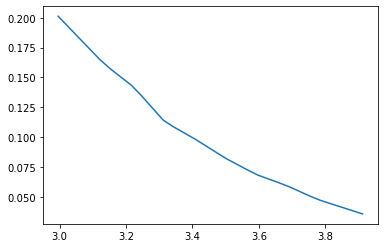

In [ ]:
x = np.linspace(np.log(20),np.log(50),30)
plt.plot(x,mco.P_lam(x))

In [ ]:
print(mco.P_lam(x))

[0.20127846 0.19213248 0.1829865  0.17384052 0.16469454 0.15701696
 0.15013006 0.14324316 0.13408621 0.12417258 0.11425896 0.10852133
 0.10352065 0.09851997 0.09301923 0.08749216 0.08200786 0.07733617
 0.07266449 0.06821322 0.06501103 0.06180884 0.05841474 0.0544449
 0.05047506 0.0469044  0.04407507 0.04124574 0.03841641 0.03558708]


[0.18801679 0.16149345 0.14152143 0.11277191 0.09826994 0.08224145
 0.06869355 0.0594072  0.04789467 0.03968961]


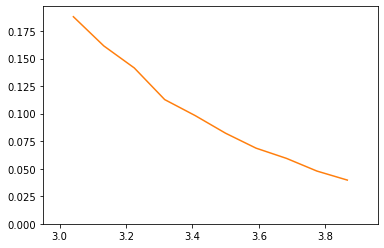

In [ ]:
counts, bins = np.histogram(mco.lnlam,range=(np.log(20),np.log(50)),bins = 10)
counts = counts/ float(np.sum(counts)*1.0)
plt.hist(counts,bins)
print(counts)
bin_mid = 0.5*(bins[0:-1] + bins[1:])
plt.plot(bin_mid,counts)
from scipy.interpolate import interp1d
pdf_lam = interp1d(bin_mid,counts)

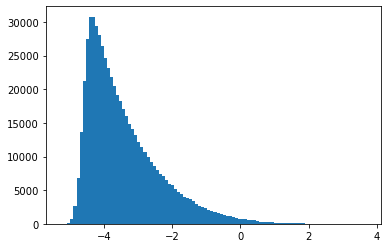

In [ ]:
plt.hist(mco.lnSZ,bins=100);
plt.show()

In [ ]:
x = np.linspace(-5, 5, 100)
plt.plot(x, mco.P_SZ.pdf(x))


AttributeError: 'interp1d' object has no attribute 'pdf'

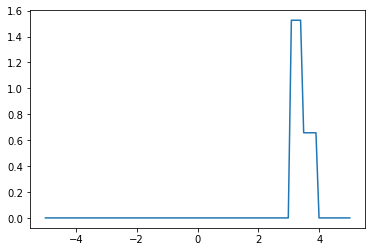

In [ ]:
plt.plot(x, mco.P_lam.pdf(x))


In [ ]:
print(count_array)
print(np.exp(diff_array))

[[12089.]]
[[0.13436937]]


In [ ]:
print(mco.P_lam.cdf(2.3) - mco.P_lam.cdf(1.6))

0.0


NameError: name 'diff_array_nc' is not defined

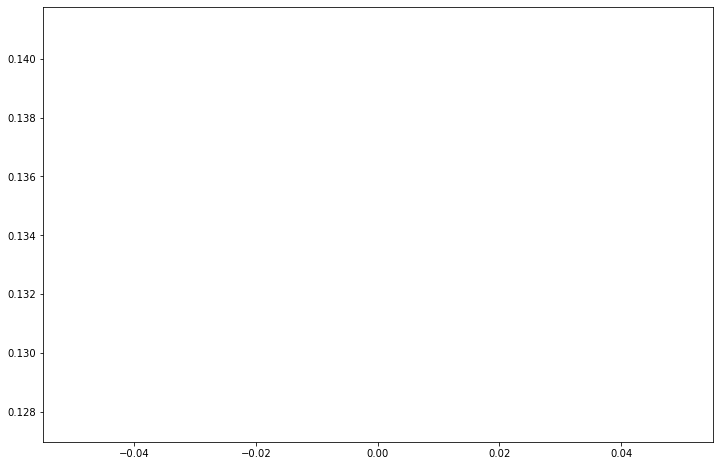

In [ ]:
plt.figure(figsize=[12, 8])
for i in range(NBINS):
    plt.plot(range(NBINS),
             np.exp(diff_array[i, :]),
             color=f'{color_list[i]}',
             label=f"$<\zeta> = {np.exp(SZ_array[i]):.3f}$")
    plt.plot(range(NBINS),
             np.exp(diff_array_nc[i, :]),
             "--",
             color=f'{color_list[i]}')
plt.plot([], [], '--', label="Before correlation correction")
plt.legend()
# locs, labels = plt.xticks()
plt.xticks(np.arange(0, NBINS, step=1),
           [f"{np.exp(lam):.2f}" for lam in lam_array])
plt.xlabel("$<\lambda>$")
plt.ylabel(r"$\frac{Mass_{MC}}{Mass_{Theory}}$")
# plt.title("Comparision Before&After r Correction")
plt.show()

In [ ]:
r_array = [0, 0.25, 0.5, 0.75, 0.99]

diff_list = [None] * len(r_array)
lam_list = [None] * len(r_array)
SZ_list = [None] * len(r_array)
count_list = [None] * len(r_array)

diff_list_nc = [None] * len(r_array)
lam_list_nc = [None] * len(r_array)
SZ_list_nc = [None] * len(r_array)
count_list_nc = [None] * len(r_array)

for i in range(len(r_array)):
    mco = MonteCarloObservables(nh,
                                r_array[i],
                                np.log(mf.mass),
                                lnlam_mean=lnlam_mean,
                                lnSZ_mean=lnSZ_mean,
                                lnMwl_mean=lnMwl_mean,
                                scatter_lam=scatter_lam,
                                scatter_Mwl=scatter_Mwl,
                                scatter_SZ=scatter_SZ,
                                mf_slope_interp=mf.beta)
    lam_list[i], SZ_list[i], diff_list[i], count_list[
        i] = mco.MC_calculate_mean_Mwl_given_lam_SZ(nbins=NBINS + 1,
                                                    correction=True)
    lam_list_nc[i], SZ_list_nc[i], diff_list_nc[i], count_list_nc[
        i] = mco.MC_calculate_mean_Mwl_given_lam_SZ(nbins=NBINS + 1,
                                                    correction=False)


KeyboardInterrupt: 

: 

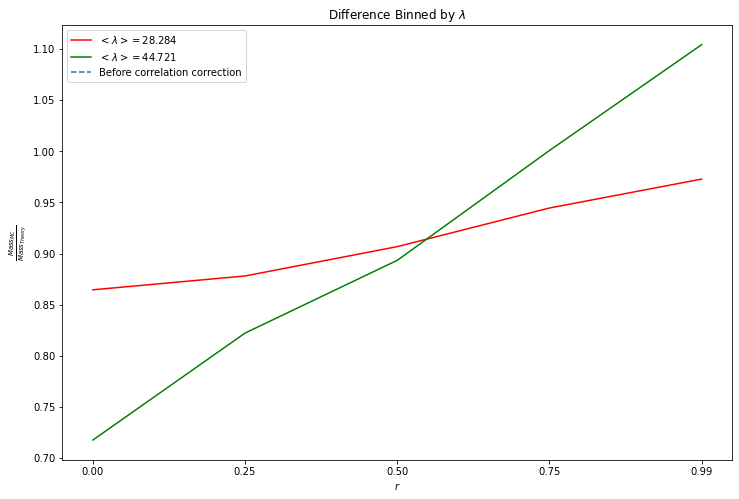

: 

In [ ]:
#binned by lambda, marginalize SZ
diff_array_lambda = np.sum(np.array(diff_list), axis=1) / np.sum(
    np.invert(np.array(diff_list) == 0), axis=1)
diff_array_lambda_nc = np.sum(np.array(diff_list_nc), axis=1) / np.sum(
    np.invert(np.array(diff_list_nc) == 0), axis=1)

plt.figure(figsize=[12, 8])
for i in range(len(lam_list[0])):
    plt.plot(
        range(len(r_array)),
        np.exp(diff_array_lambda[:, i]),
        color=f"{color_list[i]}",
        label=f"$<\lambda> = {np.exp(np.mean(np.array(lam_list)[:,i])):.3f}$")
    # plt.plot(range(len(r_array)), np.exp(diff_array_lambda_nc[:,i]), "--", color=f"{color_list[i]}")
plt.plot([], [], '--', label="Before correlation correction")
plt.legend()
locs, labels = plt.xticks()
plt.xticks(np.arange(0, 5, step=1), [f"{r:.2f}" for r in r_array])
plt.xlabel("$r$")
plt.ylabel(r"$\frac{Mass_{MC}}{Mass_{Theory}}$")
plt.title("Difference Binned by $\lambda$")
plt.show()

1.7550647

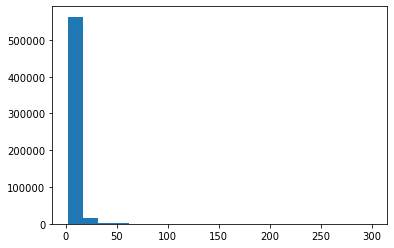

: 

In [ ]:
plt.hist(np.exp(lnlam_mean), bins=20)
np.min(np.exp(lnlam_mean))

In [ ]:
np.exp(1.5)

4.4816890703380645

: 

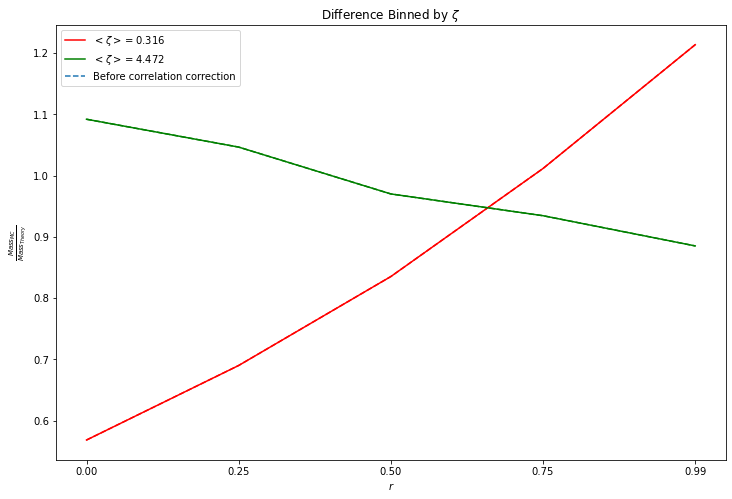

: 

In [ ]:
#binned by SZ, marginalize lambda
diff_array_SZ = np.sum(np.array(diff_list), axis=2) / np.sum(
    np.invert(np.array(diff_list) == 0), axis=2)
diff_array_SZ_nc = np.sum(np.array(diff_list_nc), axis=2) / np.sum(
    np.invert(np.array(diff_list_nc) == 0), axis=2)

plt.figure(figsize=[12, 8])
for i in range(len(SZ_list[0])):
    plt.plot(
        range(len(r_array)),
        np.exp(diff_array_SZ[:, i]),
        color=f"{color_list[i]}",
        label=f"$<\zeta> = {np.exp(np.mean(np.array(SZ_list)[:,i])):.3f}$")
    plt.plot(range(len(r_array)),
             np.exp(diff_array_SZ_nc[:, i]),
             "--",
             color=f"{color_list[i]}")
plt.plot([], [], '--', label="Before correlation correction")
plt.legend()
locs, labels = plt.xticks()
plt.xticks(np.arange(0, 5, step=1), [f"{r:.2f}" for r in r_array])
plt.xlabel("$r$")
plt.ylabel(r"$\frac{Mass_{MC}}{Mass_{Theory}}$")
plt.title("Difference Binned by $\zeta$")
plt.show()